<a href="https://colab.research.google.com/github/tajuar-akash-hub/Machine-learning-algorithms/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/tajuar-akash-hub/Datasets


fatal: destination path 'Datasets' already exists and is not an empty directory.


In [ ]:
import pandas as pd
df = pd.read_csv("/content/Datasets/diabetes.csv")
df.head()


In [ ]:
df.info()

# Age

In [ ]:
df['Age'][2]

In [ ]:
# @title AGE
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    AGE
    </strong>
</p>
"""

display(HTML(html_code))

In [ ]:
df['Age'][4]  #Age 600?

In [ ]:
df['Age'].median()   # The median is a statistical measure that represents the middle value in a sorted dataset.

In [ ]:
df['Age'] = df["Age"].fillna(df["Age"].median())   #Replace Age with median

In [ ]:
df.head()

# Gender

In [ ]:
# @title Default title text
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Gender
    </strong>
</p>
"""

display(HTML(html_code))

In [ ]:
df['Gender'].unique()

In [ ]:
df['Gender'].mode()

In [ ]:
df['Gender'].mode().iloc[0]   # in df['Gender'].mode() there is one value


#The iloc[0] in pandas refers to accessing the first row of a DataFrame or Series based on its integer position

In [ ]:
most_frequent_category = df["Gender"].mode().iloc[0]  ##The iloc[0] in pandas refers to accessing the first row of a DataFrame or Series based on its integer position

df['Gender'].fillna(most_frequent_category,inplace=True)   #replace

# With inplace=True: The original DataFrame (df) is modified directly.

In [ ]:
df.isnull().sum()

# weakness

In [ ]:
# @title Default title text
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Weakness
    </strong>
</p>
"""

display(HTML(html_code))

In [ ]:
df['weakness'].unique()

In [ ]:
df['weakness']

In [ ]:
df['weakness'] = df['weakness'].fillna(method='ffill')  # onward Fill (using the previous value)


# Encoding

In [ ]:
# @title Default title text
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Encoding
    </strong>
</p>
"""

display(HTML(html_code))

In [ ]:
df.isnull().sum()

In [ ]:
# @title Default title text
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Label Encoder
    </strong>
</p>
"""

display(HTML(html_code))

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
df["Gender"] = le.fit_transform(df['Gender'])

df["Polyuria"] = le.fit_transform(df['Polyuria'])

df["Polydipsia"] = le.fit_transform(df['Polydipsia'])

df["sudden weight loss"] = le.fit_transform(df['sudden weight loss'])

df["weakness"] = le.fit_transform(df['weakness'])

df["Polyphagia"] = le.fit_transform(df['Polyphagia'])

df["Genital thrush"] = le.fit_transform(df['Genital thrush'])

df["visual blurring"] = le.fit_transform(df['visual blurring'])

df["Itching"] = le.fit_transform(df['Itching'])

df["Irritability"] = le.fit_transform(df['Irritability'])

df["delayed healing"] = le.fit_transform(df['delayed healing'])

df["partial paresis"] = le.fit_transform(df['partial paresis'])

df["muscle stiffness"] = le.fit_transform(df['muscle stiffness'])

df["Alopecia"] = le.fit_transform(df['Alopecia'])


df["Obesity"] = le.fit_transform(df['Obesity'])

df["class"] = le.fit_transform(df['class'])


In [ ]:
df.info()

# 'Class' or target

In [ ]:
# @title Default title text
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Class or Target
    </strong>
</p>
"""

display(HTML(html_code))

In [ ]:
df.groupby('class').size()

# df.groupby('class'):
# This groups the data in the DataFrame df by the values in the 'class' column.

# Each unique value in the 'class' column will form a group.

# size() calculates the size (number of rows) in each group.

In [32]:
df.groupby('class').size().reset_index(name='count')

# The reset_index() method is used to convert the grouped results back into a DataFrame.

# The name='count' argument renames the second column in the resulting DataFrame to 'count' (which stores the number of occurrences for each class).

,class,count
0,0,200
1,1,320


In [33]:
value_counts = df.groupby('class').size().reset_index(name='count')

print(value_counts)

   class  count
0      0    200
1      1    320


# Outliers

In [34]:
# @title Default title text
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Outliers
    </strong>
</p>
"""

display(HTML(html_code))

In [35]:
z_score = (df['Age'] - df['Age'].mean())/df['Age'].std()


In [36]:
for i in z_score:
  if i<-3:
    print("You have outlier",i)
  elif i>3:
      print("You have outlier",i)
  else:
    continue
  #it is not showing the index of outlier

You have outlier 20.3456818436221


In [37]:
# @title Default title text
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Heatmap
    </strong>
</p>
"""

display(HTML(html_code))

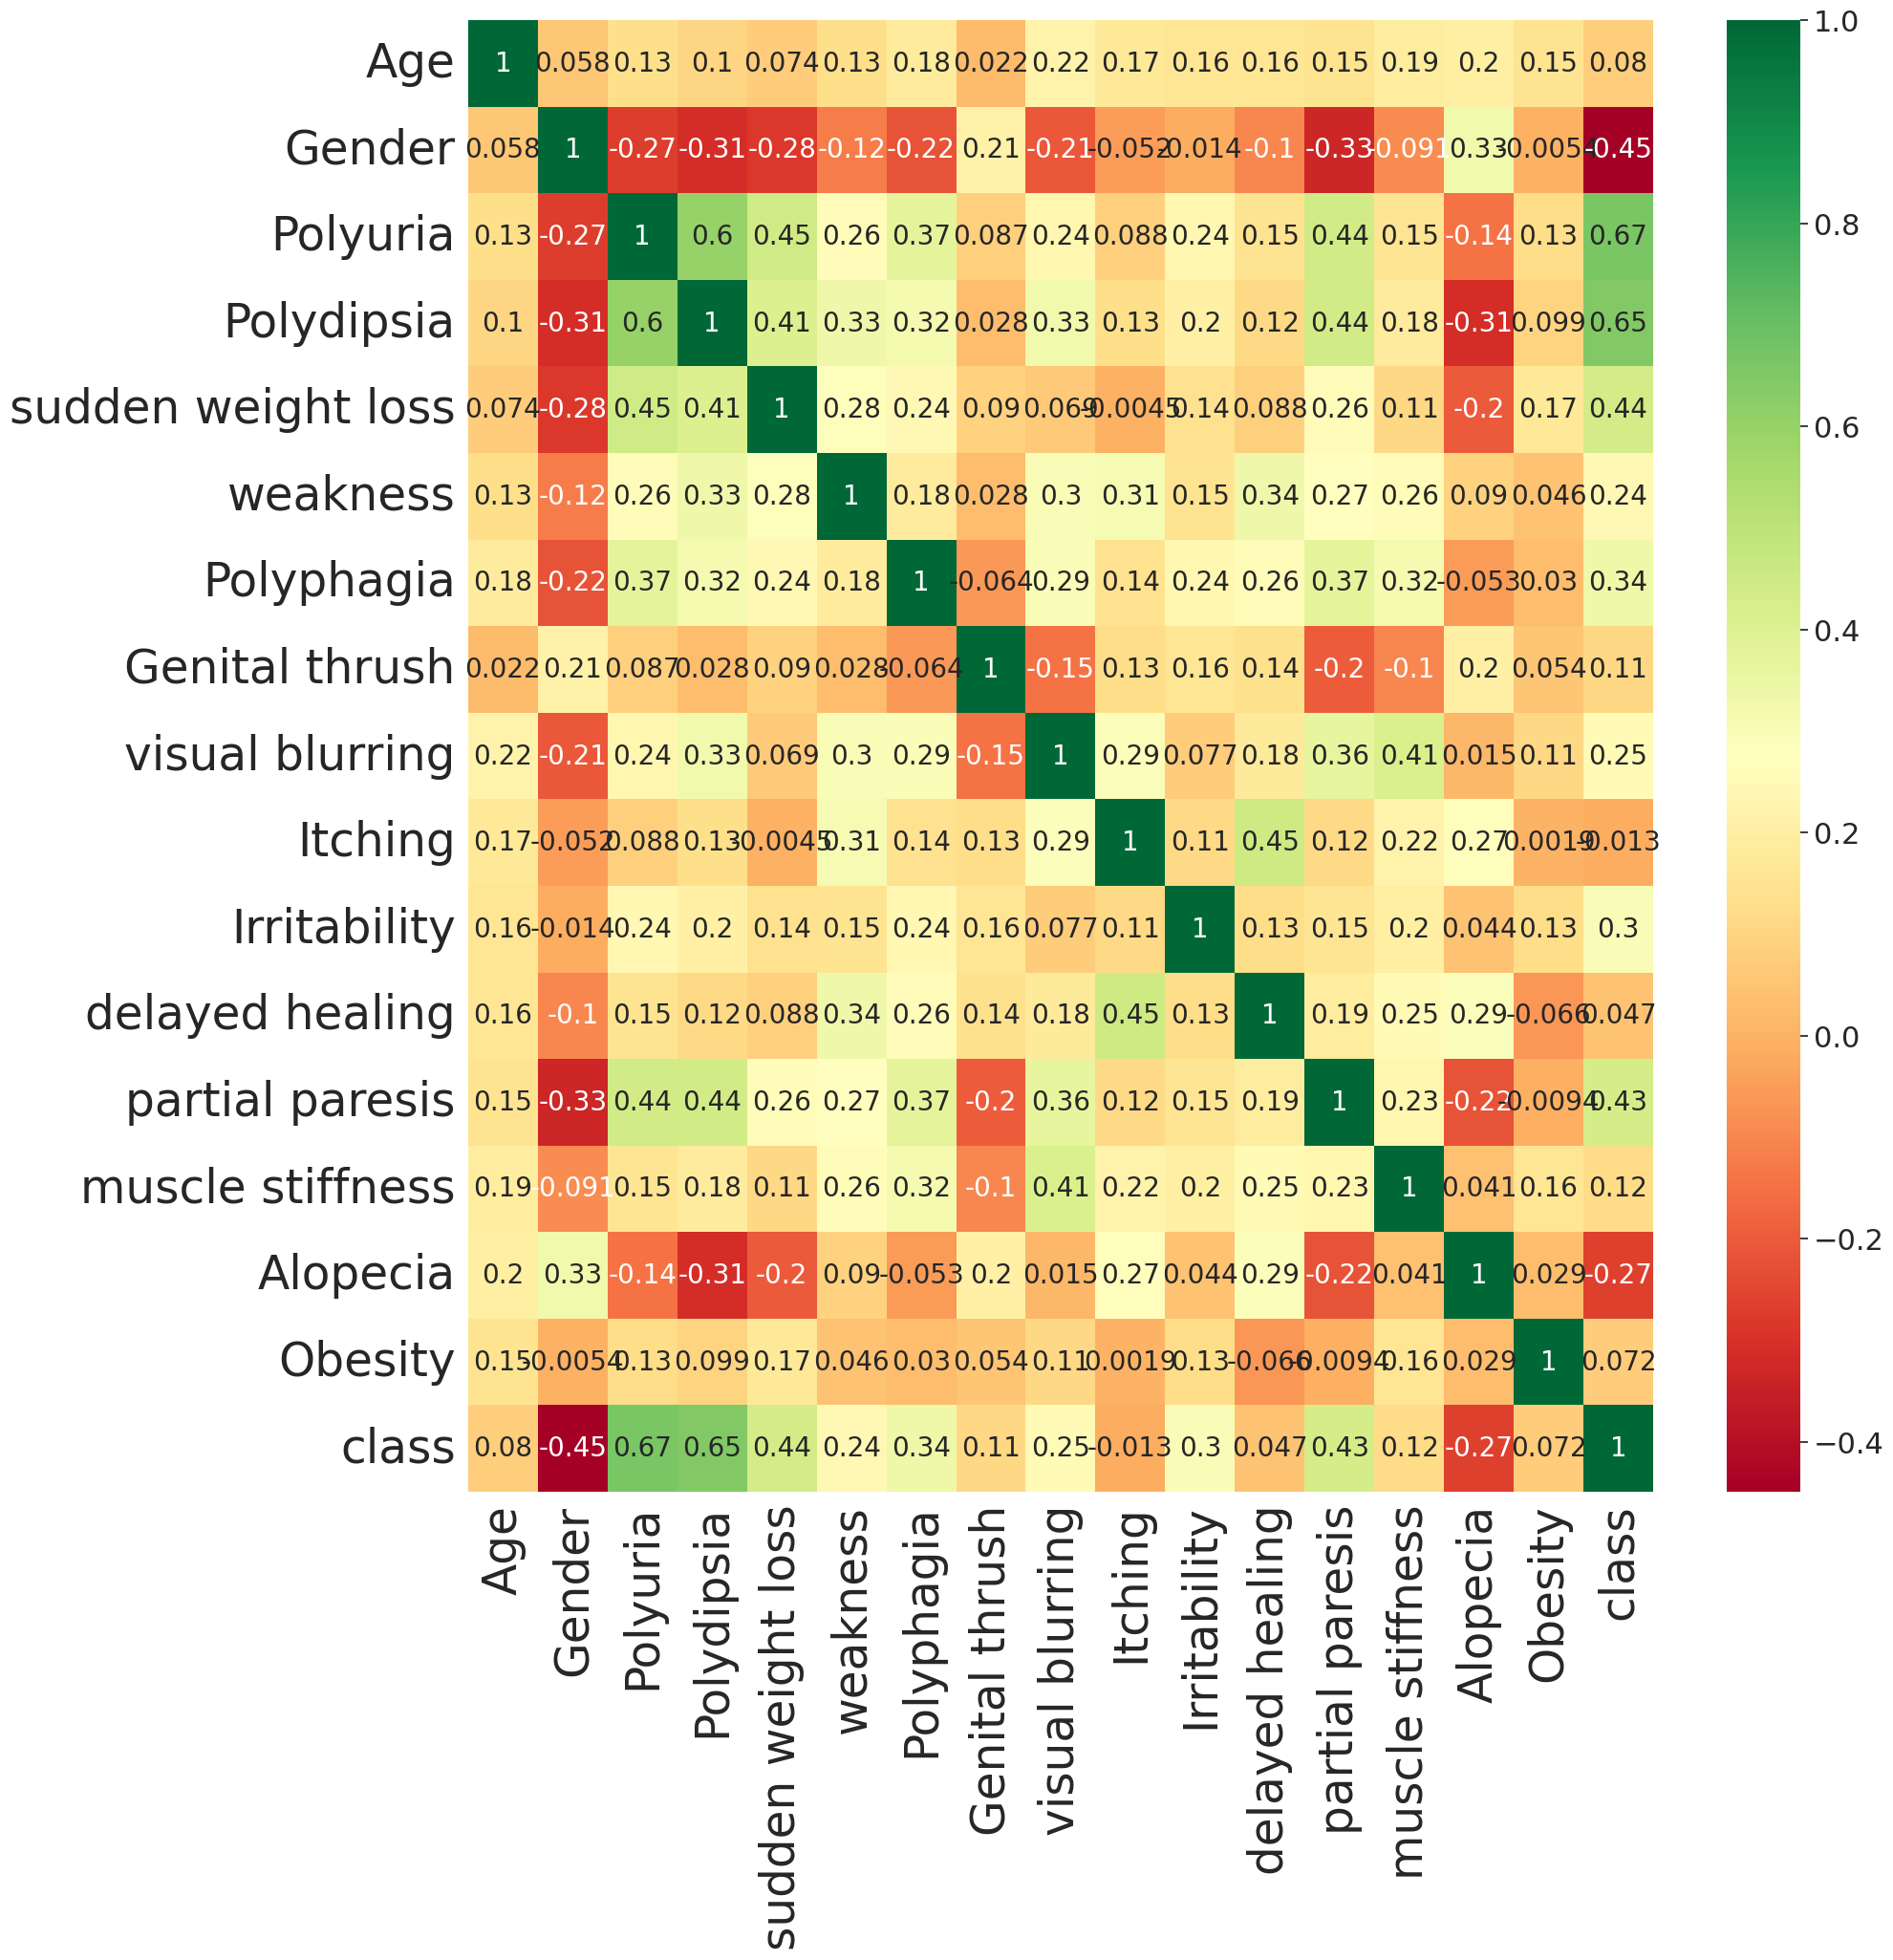

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 2)
plt.subplots(figsize=(20,20))
heat_plot = sns.heatmap(df.corr(method='pearson'), annot=True, cmap='RdYlGn', annot_kws={'size': 20})



plt.yticks(fontsize = 35)
plt.xticks(fontsize = 35)

plt.show()


In [39]:
correleations = df.corr(method='pearson')
print(correleations['class'].sort_values(ascending=False).to_string())

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.079512
Obesity               0.072173
delayed healing       0.046980
Itching              -0.013384
Alopecia             -0.267512
Gender               -0.449233


In [40]:
df['class'].iloc[0:200]

,class
0,1
1,1
2,1
3,1
4,1
...,...
195,1
196,1
197,1
198,1


# Shuffle

In [41]:
# @title Default title text
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Shuffle
    </strong>
</p>
"""

display(HTML(html_code))

In [42]:
from sklearn.utils import shuffle
shuffled_df = shuffle(df)

In [43]:
rearranged_df = shuffled_df.reset_index(drop=True)



# 1. shuffled_df.reset_index():
# Purpose: It resets the index of the DataFrame shuffled_df back to the default integer index (0, 1, 2, ...).
# By default, when you shuffle or re-arrange rows in a DataFrame, the original index is kept alongside the data.
# This method drops the existing index and replaces it with a new sequential index.


# 2. drop=True:
# Purpose: When you reset the index, if drop=False (default), the old index will be added as a new column in the DataFrame.
# However, drop=True tells pandas not to keep the old index as a column. It simply removes it.

In [44]:
rearranged_df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,30.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,69.0,0,1,1,1,1,0,0,1,1,1,0,0,1,0,1,1
2,38.0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1
3,47.0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1
4,49.0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,53.0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0
516,37.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
517,43.0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0
518,53.0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,0


# Train - Test split

In [45]:
# @title Default title text
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Train - Test split
    </strong>
</p>
"""

display(HTML(html_code))

In [46]:
x = rearranged_df.drop(columns=['class'])
x

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,30.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,69.0,0,1,1,1,1,0,0,1,1,1,0,0,1,0,1
2,38.0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0
3,47.0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0
4,49.0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,53.0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0
516,37.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
517,43.0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0
518,53.0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0


In [47]:
y = rearranged_df['class']
y

,class
0,0
1,1
2,1
3,1
4,0
...,...
515,0
516,0
517,0
518,0


# Scaling dataset

In [48]:
# @title Default title text
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Scaling Dataset
    </strong>
</p>
"""

display(HTML(html_code))

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [50]:
scaler1 = MinMaxScaler()
MinMax_scaled_df = scaler1.fit_transform(x)


In [51]:
MinMax_scaled_df

array([[0.0239726 , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09075342, 0.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.03767123, 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.04623288, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06335616, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04109589, 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [53]:
print("train data size (features):",len(x_train))
print("train data size (target):",len(y_train))

print("test data size(feature)",len(x_test))
print("test data size(target)",len(y_test))

train data size (features): 416
train data size (target): 416
test data size(feature) 104
test data size(target) 104


In [54]:
# @title Default title text
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Logistic Regression
    </strong>
</p>
"""

display(HTML(html_code))

In [55]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty = 'l2' , tol = 0.0001 , solver = 'liblinear',
                           max_iter=100,multi_class='auto')

# penalty : Penalty helps us to solve overfitting issue

#tol = tolerance , max_itr = max iteration

Penalty : Regulirazation
solver : optimization (converge model to make loss minimum)


Take help from the documentation :
https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html

In [56]:
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='auto', solver='liblinear')

In [57]:
pred_values = model.predict(x_test)

In [58]:
# @title Default title text
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    Evaluation Matrices
    </strong>
</p>
"""

display(HTML(html_code))

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [60]:
accuracy = accuracy_score(y_test,pred_values)
precision = precision_score(y_test,pred_values)
recall = recall_score(y_test,pred_values)
f1 = f1_score(y_test,pred_values)
AUC = roc_auc_score(y_test,pred_values)



In [61]:
print("accuracy : ",accuracy)
print("precision : ",precision)
print("recall : ",recall)
print("f1 score : ",f1)
print("AUC Score : ",AUC)

accuracy :  0.8846153846153846
precision :  0.9365079365079365
recall :  0.8805970149253731
f1 score :  0.9076923076923077
AUC Score :  0.8862444534086326


In [62]:
# @title Default title text
from IPython.core.display import display, HTML

html_code = """
<a id='1.1'></a>
<p style="font-size: 35px; color: #34656d; font-family: 'Comic Sans MS'; text-align: center; background-color: #f9b208; border-radius: 5px 5px;">
    <strong>
    ROC CURVE
    </strong>
</p>
"""

display(HTML(html_code))

In [63]:
roc_score = model.predict_proba(x_test)[:,1]
fpr,tpr,threshold2 = roc_curve(y_test,roc_score)

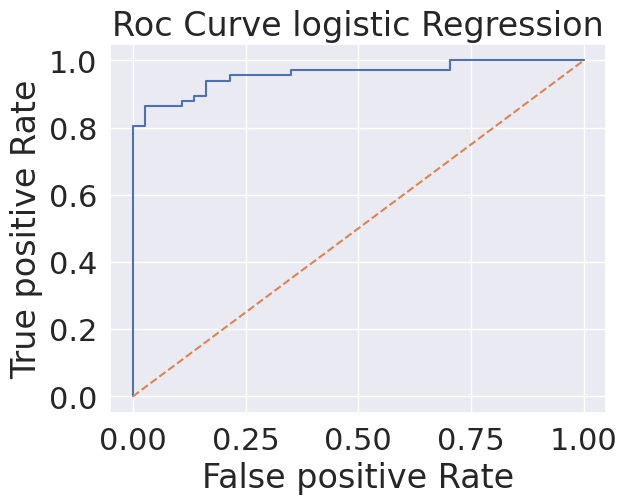

In [64]:
plt.plot(fpr,tpr)
plt.plot([0,1],ls="--")  #random choice

plt.title("Roc Curve logistic Regression")
plt.ylabel("True positive Rate")
plt.xlabel("False positive Rate")
plt.show()

# K Fold cross validation


# End of this section